#                             Blinkit Sales Data Analysis

#### Analyzed Blinkit’s sales data to generate actionable insights across multiple business KPIs. Calculated total sales, average sales per item, and total number of items sold to evaluate overall performance. Assessed average customer ratings to understand satisfaction levels. Performed grouped analysis to identify trends in total sales based on outlet establishment year, outlet size, and outlet location type using Pandas and Seaborn. Created visualizations like bar charts and pie charts to present key findings. Found that Tier 1 locations and medium-sized outlets generated higher revenue. The analysis helps optimize inventory planning, store expansion strategy, and product focus. Tools used include Python, Pandas, NumPy, Matplotlib, and Seaborn. The project showcases practical data analytics and business intelligence skills relevant to real-world quick commerce applications.

## Business Requirement
### To conduct a comprehensive analysis of Blinkit's sales performance, customer satisfaction, and inventory distribution to identify key insights and opportunities for optimization using various KPIs and visualizations in Power BI.


In [1]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import Raw Data

In [2]:
df=pd.read_csv(r"C:\Users\bhara\Downloads\blinkit_data.csv")

In [3]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


## Sample Data

In [4]:
df.head(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


### **Size of Data**

In [5]:
print("Size of Data:",df.shape)

Size of Data: (8523, 12)


### **Field Info**

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### **Type Of Data**

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## **Data Cleaning**

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [9]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## KPI’s Requirements:
### 1.Total Sales: The overall revenue generated from all items sold.
### 2.Average Sales: The average revenue per sale.
### 3.Number of Items: The total count of different items sold.
### 4.Average Rating: The average customer rating for items sold. 

In [11]:
#total sales
total_sales=df['Sales'].sum()

#Average sales
avg_sales=df['Sales'].mean()

#No od items sold
no_of_items_sold=df['Sales'].count()

#averege ratings
avg_ratings=df['Rating'].mean()

#Display
print(f"total Sales:${total_sales:,.0f}")
print(f"Avarege Sales:${avg_sales:,.0f}")
print(f"No Of Items Sold:${no_of_items_sold:,.0f}")
print(f"No Of Items Sold:{total_sales:,.0f}")
print(f"Avg Ratings:{avg_ratings:,.0f}")

total Sales:$1,201,681
Avarege Sales:$141
No Of Items Sold:$8,523
No Of Items Sold:1,201,681
Avg Ratings:4


## 1.Total Sales by Fat Content:
#### Objective: Analyze the impact of fat content on total sales.
#### Additional KPI Metrics: Assess how other KPIs (Average Sales, Number of Items, Average Rating) vary with fat content.

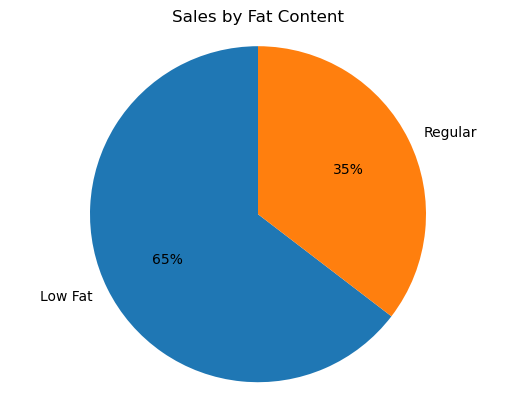

In [12]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(
    sales_by_fat,
    labels=sales_by_fat.index,
    autopct='%.0f%%',
    startangle=90
)

plt.title('Sales by Fat Content')
plt.axis('equal')  
plt.show()  

## 2.Total Sales by Item Type:
#### Objective: Identify the performance of different item types in terms of total sales.
#### Additional KPI Metrics: Assess how other KPIs (Average Sales, Number of Items, Average Rating) vary with fat content.


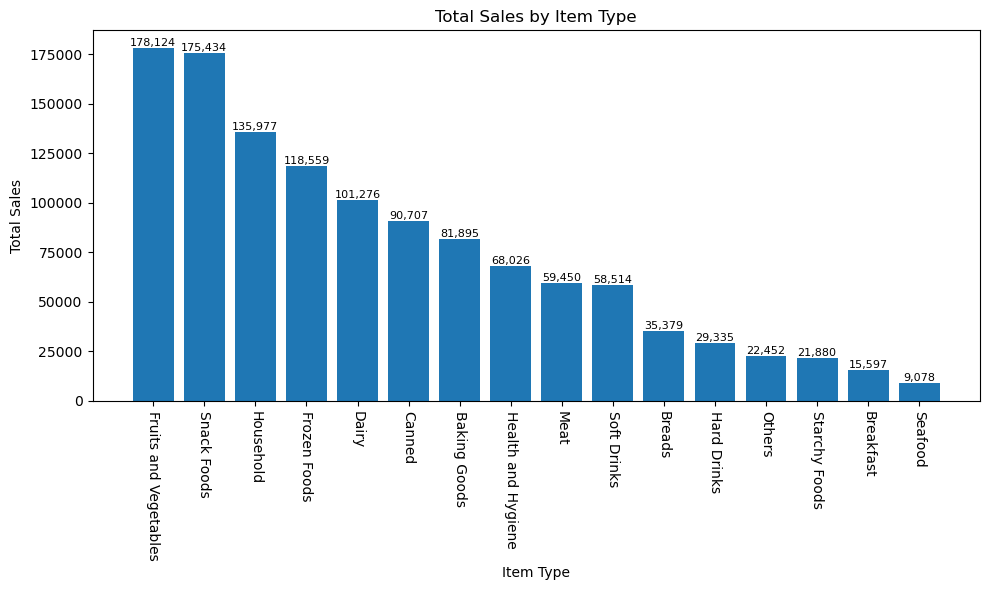

In [13]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)
plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center',
        va='bottom',   
        fontsize=8
    )

plt.tight_layout()
plt.show()


## 3.Fat Content by Outlet for Total Sales:
#### Objective: Compare total sales across different outlets segmented by fat content.
#### Additional KPI Metrics: Assess how other KPIs (Average Sales, Number of Items, Average Rating) vary with fat content.


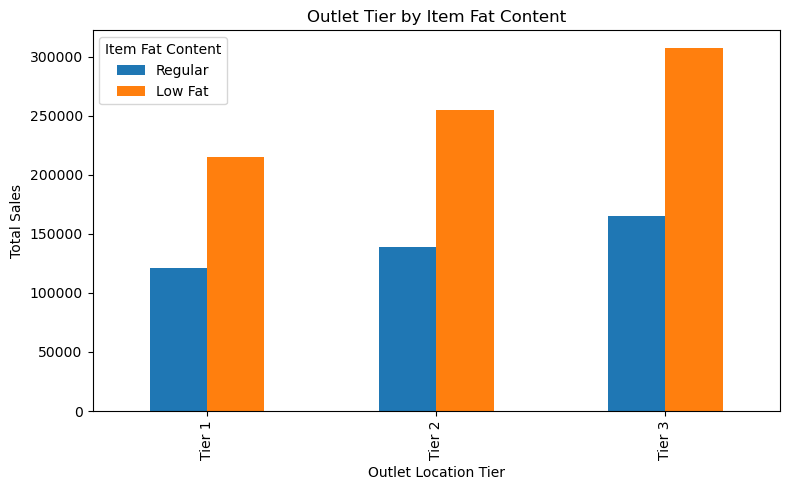

In [14]:
# Group and reshape the data
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()

grouped = grouped[['Regular', 'Low Fat']]

# Plotting
ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()  # <- fixed here
plt.show()


## 4.Total Sales by Outlet Establishment:
#### Objective: Evaluate how the age or type of outlet establishment influences total sales.


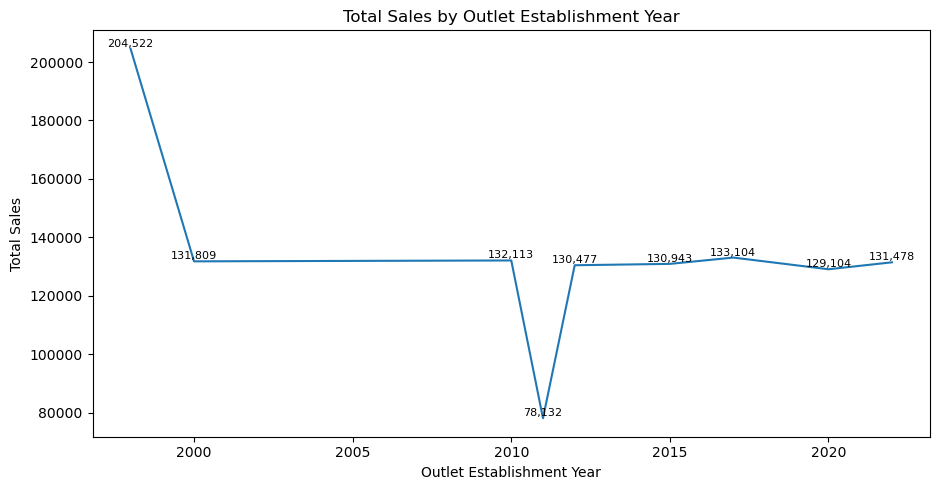

In [15]:
# Grouping sales by outlet establishment year
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

# Plotting
plt.figure(figsize=(9.5, 5))
plt.plot(sales_by_year.index, sales_by_year.values, linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

# Annotating points
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


## 5.Sales by Outlet Size:
#### Objective: Evaluate how the age or type of outlet establishment influences total sales.


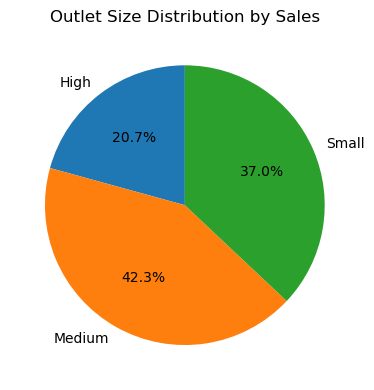

In [16]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4, 4))
plt.pie(
    sales_by_size,
    labels=sales_by_size.index,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Outlet Size Distribution by Sales')
plt.tight_layout()
plt.show()


## 6.Sales by Outlet Location:
#### Objective: Assess the geographic distribution of sales across different locations.

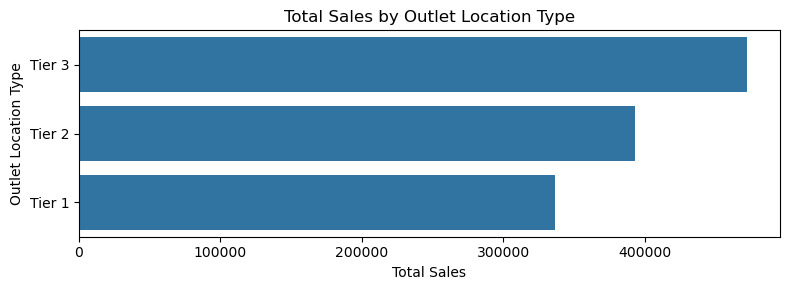

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and sort sales by outlet location type
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

# Plotting
plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()  # <-- corrected
plt.show()
